# 0. Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import DataLoader
import torch.nn as nn


from helpers import read_hdf5, CombineDataset
from lenshelpers import Residual

from model.helpers_model import NeuralNet

import warnings
warnings.filterwarnings('ignore') 

# 1. Building the data set

In [2]:
# Build the four classes 
config_repo_model = 'data/configFile/config_model'
ratio = 0.75
percent = 0.01

size = 30
for i in np.arange(1,4):
    #model_name = config_repo_model + str(i) + '.yaml'
    res = Residual()
    res.build(size, i, ratio = ratio, per_error = percent)

print('Data Generation Finished')

Data Generation Finished


In [3]:
metadata = pd.DataFrame()

for i in np.arange(1,4):
    str_ID = "E"+str(i)+"P"+str(int(percent*100))+"R"+str(int(ratio*100))
    [img, meta] = read_hdf5(str_ID, path = "data/dataSet/")
    metadata = pd.concat([metadata,meta], ignore_index=True)
    if i == 1:
        final_array = img
    else:
         final_array = np.concatenate((final_array, img))
metadata ['ID'] = np.arange(0,final_array.shape[0])
data_set = CombineDataset(metadata,'ID','class',final_array)

print('Reading Data Finished')
data_train, data_test = train_test_split(data_set,train_size=0.9,random_state=42)

Reading Data Finished


In [4]:
batch_size_train = 1
batch_size_test = 1
max_epoch = 50


loader_train = DataLoader(data_train, batch_size = batch_size_train, shuffle = True, 
                          num_workers = 0, drop_last=True)

loader_test = DataLoader(data_test, batch_size = batch_size_test, shuffle = True, 
                         num_workers = 0, drop_last=True)

# 2. Baseline

## 2.1. Residual network

**Results** : 6 epochs - 0.993 accuracy

In [5]:
test_acc = np.zeros(max_epoch)
netbasic = NeuralNet('BasicCNN', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train)
    res = netbasic.test(loader_test,epoch)
    test_acc[epoch] = res
    
print('Finished Training')

Finished Training


## 2.2. Metadata network
**Results** : 4 epochs - 0.865 accuracy 

In [6]:
test_acc_meta = np.zeros(max_epoch)
netbasic = NeuralNet('BasicTabular', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train)
    res = netbasic.test(loader_test,epoch)
    test_acc_meta[epoch] = res
    
print('Finished Training')

Finished Training


## 2.3. Tabular & Residual network
**Results** : 8 epochs -  0.995 accuracy

In [7]:
test_acc_metaxres = np.zeros(max_epoch)
netbasic = NeuralNet('BasicCNNTabular', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train)
    res = netbasic.test(loader_test,epoch)
    test_acc_metaxres[epoch] = res
    
print('Finished Training')

epoch: 1.000, accuracy: 0.333 
Finished Training


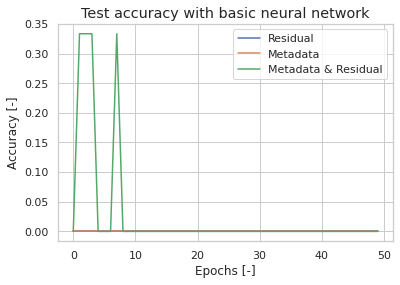

In [8]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc, label = 'Residual')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_meta, label = 'Metadata')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_metaxres, label = 'Metadata & Residual')

plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')
plt.title('Test accuracy with basic neural network', size = 'large')
plt.savefig('figures/basicS3000P1.jpeg')

# 3. Building different model

## 3.1. AlexNet - Residual maps
### 3.1.2 Padding
**Results** :  epochs -  accuracy 

In [9]:
test_acc_pad = np.zeros(max_epoch)
netbasic = NeuralNet('AlexNet', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] = res
    
print('Finished Training')

Finished Training


### 3.1.2. Interpolation

**Results** :  epochs -  accuracy 

In [10]:
test_acc_int = np.zeros(max_epoch)
netbasic = NeuralNet('AlexNet', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train, resize_tp = 'Interpolate')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] = res
    
print('Finished Training')

KeyboardInterrupt: 

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')

## 3.2. Resnet18 - Residual maps
### 3.2.1. Padding
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_pad = np.zeros(max_epoch)
netbasic = ConvNN('AlexNet', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] = res
print('Finished Training')


### 3.2.2. Interpolation
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_int  = np.zeros(max_epoch)
netbasic = ConvNN('AlexNet', 'Adam')
for epoch in range(max_epoch):
    netbasic.train(loader_train, resize_tp = 'Interpolate')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] = res
    
print('Finished Training')

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')

## 3.3. VGG16 - Residual maps
### 3.3.1. Padding
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_pad = np.zeros(max_epoch)
netbasic = ConvNN('VGG16', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] =  res
    
print('Finished Training')

### 3.3.2 Interpolation
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_int = np.zeros(max_epoch)
netbasic = ConvNN('VGG16', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Interpolation')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] =  res
    
print('Finished Training')

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')

## 3.4. Dense Net 161 - Residual maps
### 3.4.1 Padding
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_pad = np.zeros(max_epoch)
netbasic = ConvNN('DenseNet161', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] =  res
    
print('Finished Training')

### 3.4.2 Interpolation
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_int = np.zeros(max_epoch)
netbasic = ConvNN('DenseNet161', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Interpolation')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] =  res
    
print('Finished Training')

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')

## 3.5. Google Net - Residual maps
### 3.5.1 Padding
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_pad = np.zeros(max_epoch)
netbasic = ConvNN('GoogleNet', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] =  res
    
print('Finished Training')

### 3.5.2 Interpolation
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_int = np.zeros(max_epoch)
netbasic = ConvNN('GoogleNet', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Interpolation')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] =  res
    
print('Finished Training')

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')

## 3.6. Squeeze Net 1_1  - Residual maps
### 3.6.1 Padding
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_pad = np.zeros(max_epoch)
netbasic = ConvNN('SqueezeNet', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Padding')
    res = netbasic.test(loader_test,epoch)
    test_acc_pad[epoch] =  res
    
print('Finished Training')

### 3.6.2 Interpolation
**Results** :  epochs -  accuracy 

In [ ]:
test_acc_int = np.zeros(max_epoch)
netbasic = ConvNN('SqueezeNet', 'Adam')
for epoch in range(max_epoch):  # loop over the dataset multiple times
    netbasic.train(loader_train, resize_tp = 'Interpolation')
    res = netbasic.test(loader_test,epoch)
    test_acc_int[epoch] =  res
    
print('Finished Training')

In [ ]:
sns.set_theme(style="whitegrid")

sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_pad, label = 'Padding')
sns.lineplot(x=np.arange(0,max_epoch), y=test_acc_int, label = 'Interpolation')
# change legend texts
plt.xlabel('Epochs [-]')
plt.ylabel('Accuracy [-]')